# ANÁLISIS EXPLORATORIO (EDA)

In [42]:
# Librerías que se usarán para el EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --upgrade
import pandas_profiling # Library for automatic EDA
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
import ppscore as pps
%matplotlib inline
pandas_profiling.__version__

'3.0.0'

In [4]:
# Lectura de datos
FILEPATH = 'data/data_perfil_racimo.csv'
data = pd.read_csv(FILEPATH)
data.head(10)

,finca,lote,anio,semana,edad_racimo,peso_racimo,calibre_segunda_mano,calibre_ultima_mano,cantidad_manos,largo_segunda_mano,...,air_temperature_max_avg,air_temperature_min_avg,relative_humidity_avg,wind_speed_avg,solar_radiation_avg,daiy_et0_avg,wind_dir_avg,daily_rain_avg,year_rain_avg,sunny_hours_avg
0,80101,4339,2019,34,11.000000,18.000000,14.000000,8.000000,6.0,10.000000,...,34.15,26.800422,91.075092,-3998.061084,-3999.516118,-3999.567575,-1884.160294,0.073005,-3058.008869,-1999.783364
1,38,2815,2020,29,11.000000,17.328571,13.000000,9.714285,6.0,9.500000,...,34.43,27.066091,89.824399,-3330.838532,-3332.900450,-3332.957297,-3214.666836,0.003025,-6442.684275,0.015139
2,80229,2234,2019,13,11.000000,19.100000,12.000000,7.000000,6.0,10.000000,...,35.29,27.123032,81.976500,-3994.841460,-3999.524897,-3999.533633,-1929.082297,0.007589,-3968.857113,-1999.784506
3,80101,3134,2019,2,12.000000,22.000000,13.000000,9.000000,7.0,9.900000,...,33.50,26.088297,84.572279,-3996.735963,-3999.530365,-3999.547913,-1975.916736,0.013154,-3994.221339,-3999.588513
4,80220,2181,2019,35,11.000000,24.100000,14.000000,9.000000,7.5,10.750000,...,59.67,27.943848,89.157047,-3002.449064,-3004.459172,-3004.516568,-2208.130850,0.044517,-1876.856280,-673.057810
5,7220,159,2020,37,11.000000,28.971428,14.000000,10.285714,7.0,8.914285,...,34.70,25.833690,91.015153,-3330.447428,-3332.898205,-3332.956446,-3189.418614,0.020287,-6317.050843,0.016843
6,80225,1940,2018,43,12.000000,20.200000,14.000000,9.000000,7.0,11.000000,...,133.60,36.535647,-1933.565296,-3997.871027,-4000.725896,-4000.756701,-3945.491905,0.063208,-5320.541281,-1997.403722
7,80233,4174,2019,34,11.000000,17.150000,13.750000,9.750000,5.5,9.100000,...,34.15,26.800422,91.075092,-3998.061084,-3999.516118,-3999.567575,-1884.160294,0.073005,-3058.008869,-1999.783364
8,31,75,2019,23,10.857142,18.942857,12.571428,8.000000,7.0,9.357142,...,37.17,27.074976,88.528767,-3997.753307,-3999.520434,-3999.565421,-1881.878852,0.058690,-3485.514077,-1999.782701
9,20004,3832,2018,7,11.000000,20.000000,12.000000,8.000000,7.0,10.000000,...,59.23,27.501663,-1936.929116,-3994.933240,-3999.487184,-3999.508455,-3923.959586,0.000892,-5935.510625,-1999.778164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58461 entries, 0 to 58460
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   finca                    58461 non-null  int64  
 1   lote                     58461 non-null  int64  
 2   anio                     58461 non-null  int64  
 3   semana                   58461 non-null  int64  
 4   edad_racimo              58461 non-null  float64
 5   peso_racimo              58461 non-null  float64
 6   calibre_segunda_mano     58461 non-null  float64
 7   calibre_ultima_mano      58461 non-null  float64
 8   cantidad_manos           58461 non-null  float64
 9   largo_segunda_mano       58461 non-null  float64
 10  largo_ultima_mano        58461 non-null  float64
 11  peso_vastago             58461 non-null  float64
 12  peso_fruta               58461 non-null  float64
 13  porcentaje_vastago       58461 non-null  float64
 14  ratio                 

## Descripción del data set

Este conjunto de datos contiene 58461 registros de racimos de plátanos producidos entre 2017 y 2020, y está compuesto por 29 variables cuya descripción se muestra a continuación.

1.   `finca`. Número de la finca platanera registrada en Unibán.
2.   `lote`. Lote del rácimo de plátanos producido en la finca.
3.   `anio`. Semana del año en la que se cortó el racimo.
4.   `semana`. Semana del año en la que se cortó el racimo.
5.   `edad_racimo`. Edad en semanas del racimo.
6.   `peso_racimo`. Peso en kg del racimo.
7.   `calibre_segunda_mano`. Calibre en mm de la segunda mano del racimo.
8.   `calibre_ultima_mano`. Calibre en mm de la última mano del racimo.
9.   `cantidad_manos`. Número de manos del racimo.
10.   `largo_segunda_mano`. Largo en cm de la segunda mano del racimo.
11.   `largo_ultima_mano`. Largo en cm de la última mano del racimo.
12.   `peso_vastago`. Peso en kg del vástago del racimo.
13.   `peso_fruta`. Peso en kg de la fruta del racimo.
14.   `porcentaje_vastago`. Porcentaje en masa del vástago del racimo.
15.   `ratio`. Cantidad de cajas de la fruta que se armaron con este racimo
16.   `peso_total_defectos`. Peso en kg del desecho del racimo.
17.   `anio.1`. Año a partir del cual el racimo empieza a crecer.
18.   `semana.1`. Semana a partir de la cual el racimo empieza a crecer.
19.   `air_temperature_avg`. Temperatura promedio del aire en °C.
20.   `air_temperature_max_avg`. Temperatura máxima promediada del aire en °C.
21.   `air_temperature_min_avg`. Temperatura mínima promediada del aire en °C.
22.   `relative_humidity_avg`. Humedad relativa promedio del aire.
23.   `wind_speed_avg`. Velocidad promedio del viento.
24.   `solar_radiation_avg`. Radiación solar promedio.
25.   `daiy_et0_avg`. Evapotranspiración diaria promedio.
26.   `wind_dir_avg`. Dirección promedio del viento en grados.
27.   `daily_rain_avg`. Precipitación diaria promedio en.
28.   `year_rain_avg`. Precipitación anual promedio.
29.   `sunny_hours_avg`. Porcentaje promedio de horas de sol.



In [6]:
data.describe()

,finca,lote,anio,semana,edad_racimo,peso_racimo,calibre_segunda_mano,calibre_ultima_mano,cantidad_manos,largo_segunda_mano,...,air_temperature_max_avg,air_temperature_min_avg,relative_humidity_avg,wind_speed_avg,solar_radiation_avg,daiy_et0_avg,wind_dir_avg,daily_rain_avg,year_rain_avg,sunny_hours_avg
count,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,...,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000
mean,55833.025402,2469.612545,2018.956193,24.143651,10.832222,23.006030,12.823038,9.062427,6.822547,10.686496,...,56.491148,26.379175,-896.677414,-3939.907539,-3942.304696,-3942.429278,-2880.314362,0.062272,-4909.010894,-1775.906135
std,35119.594683,1589.171738,0.838017,14.734012,0.470544,18.962449,4.808509,24.713692,1.563628,37.022850,...,32.378095,4.817358,1431.372904,482.473208,482.509406,482.514759,1077.002214,0.057294,1243.082590,885.579929
min,30.000000,52.000000,2017.000000,1.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,32.830000,13.292948,-4954.775974,-4998.671443,-4999.455940,-4999.471666,-4968.305764,0.000000,-7216.519866,-4145.755836
25%,7221.000000,1771.000000,2018.000000,11.000000,10.594594,19.650000,12.000000,8.000000,6.000000,9.600000,...,34.700000,26.314880,-1930.877211,-3998.253539,-3999.541366,-3999.577626,-3925.858911,0.010803,-5936.474345,-1999.789457
50%,80101.000000,2234.000000,2019.000000,23.000000,11.000000,22.218750,12.882352,8.666666,6.777777,9.900000,...,37.850000,27.030127,85.350377,-3997.665339,-3999.517937,-3999.562846,-2350.567241,0.049315,-5404.457738,-1999.782933
75%,80225.000000,4161.000000,2020.000000,36.000000,11.000000,25.454545,13.375000,9.391304,7.050000,10.154545,...,70.170000,27.501663,90.070256,-3995.287913,-3999.496077,-3999.527387,-1915.412933,0.098093,-3927.170714,-1999.777935
max,80980.000000,5455.000000,2020.000000,52.000000,13.000000,2110.666666,429.694444,5075.000000,97.000000,5004.000000,...,207.800000,37.827563,96.405476,-2491.704052,-2494.859822,-2494.860656,47.572901,0.237767,-1876.856280,0.024417


In [ ]:
report = pandas_profiling.ProfileReport(data)
display(report)

Del reporte anterior se observa que la distribución de algunas variables numéricas, como `peso_racimo`, no se puede observar bien debido a la presencia de valores atípicos cuya magnitud es muy grande. A continuación, se muestra la distribución de las variables `edad_racimo` y `peso_racimo` para ejemplificar.

<AxesSubplot:xlabel='edad_racimo'>

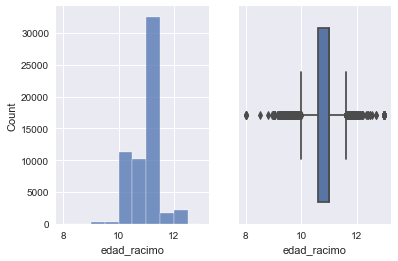

In [12]:
# edad_racimo
fig, axs = plt.subplots(ncols=2)
sns.histplot(x = data['edad_racimo'], binwidth = 0.5, ax = axs[0])
sns.boxplot(x = data['edad_racimo'], ax = axs[1])

In [17]:
Q1 = data['edad_racimo'].quantile(0.25)
Q3 = data['edad_racimo'].quantile(0.75)
IQR = Q3 - Q1

outliers_leves = sum((data['edad_racimo'] < Q1-1.5*IQR) | (data['edad_racimo'] > Q3+1.5*IQR))
outliers_extremos = sum((data['edad_racimo'] < Q1-3*IQR) | (data['edad_racimo'] > Q3+3*IQR))
P_outliers_leves = round(100*outliers_leves/len(data['edad_racimo']), 3)
P_outliers_extremos = round(100*outliers_extremos/len(data['edad_racimo']), 3)

# Porcentaje de datos atípicos de la variable edad_racimo
print("El " + str(P_outliers_leves) + " % son datos atípicos leves", 
      "y el " + str(P_outliers_extremos) + " % son datos atípicos extremos.")

El 5.756 % son datos atípicos leves y el 0.428 % son datos atípicos extremos.


<AxesSubplot:xlabel='peso_racimo'>

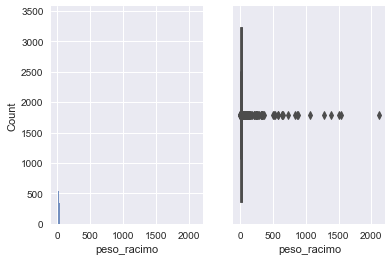

In [15]:
# peso_racimo
fig, axs = plt.subplots(ncols=2)
sns.histplot(x = data['peso_racimo'], binwidth = 0.5, ax = axs[0])
sns.boxplot(x = data['peso_racimo'], ax = axs[1])

In [18]:
Q1 = data['peso_racimo'].quantile(0.25)
Q3 = data['peso_racimo'].quantile(0.75)
IQR = Q3 - Q1

outliers_leves = sum((data['peso_racimo'] < Q1-1.5*IQR) | (data['peso_racimo'] > Q3+1.5*IQR))
outliers_extremos = sum((data['peso_racimo'] < Q1-3*IQR) | (data['peso_racimo'] > Q3+3*IQR))
P_outliers_leves = round(100*outliers_leves/len(data['peso_racimo']), 3)
P_outliers_extremos = round(100*outliers_extremos/len(data['peso_racimo']), 3)

# Porcentaje de datos atípicos de la variable peso_racimo
print("El " + str(P_outliers_leves) + " % son datos atípicos leves", 
      "y el " + str(P_outliers_extremos) + " % son datos atípicos extremos.")

El 1.03 % son datos atípicos leves y el 0.219 % son datos atípicos extremos.


Teniendo en cuenta lo anterior, y con el fin de obtener una mejor perspectiva de la distribución de las variables numéricas y sus interacciones con otras variables, se procede a reemplazar los valores extremos por el promedio de los valores centrales. Por ejemplo, el primer cuartil de la variable `peso_racimo` es 19.65 kg y el tercer cuartil es 25.45 kg, es decir, el 50 % de las observaciones se encuentran entre estos dos valores; adicionalmente, el percentil 1 es 14.00 kg y el percentil 99 es 19.69 kg, por lo que el 98 % de las observaciones se encuentran entre estos valores. Así, los valores por debajo del percentil 1 y por encima del percentil 99 se reemplazan por el promedio de los valores que están entre estos dos percentiles. Para el resto de variables, de ser posible, se opta por establecer un límite superior e inferior con significado físico, como el intervalo de medición de los intrumentos y equipos meteorológicos.

In [25]:
Q1 = data['peso_racimo'].quantile(0.25)
Q3 = data['peso_racimo'].quantile(0.75)
IQR = Q3 - Q1
print("Primer cuartil de peso_racimo: " + str(round(Q1,3)),
      "\nTercer cuartil de peso_racimo: ", str(round(Q3,3)),
      "\nIntervalo intercuartílico de peso_racimo: ", str(round(IQR,3)))

Primer cuartil de peso_racimo: 19.65 
Tercer cuartil de peso_racimo:  25.455 
Intervalo intercuartílico de peso_racimo:  5.805


In [23]:
# Función para reemplazar los valores
def reemplazar(data, thresh = 0.05, lowlim = None, uplim = None):
    data_copy = data.copy()
    if lowlim is None:
        qleft = data.quantile(thresh) # Límite izquierdo no especificado
    else:
        qleft = lowlim # Límite izquierdo especificado
    if uplim is None:
        qright = data.quantile(1-thresh) # Límite derecho no especificado
    else:
        qright = uplim # Límite derecho especificado
    
    value = data[(data >= qleft) & (data <= qright)].mean()
    data_copy[(data < qleft) | (data > qright)] = value
    return data_copy

La función anterior, `reemplazar`, acepta un objeto numérico de tipo `pandas.Series` como variable, un parámetro `thresh` cuyo valor por defecto es `0.05`, parámetros opcionales `lowlim` y `uplim`, y devuelve una copia de la variable con valores extremos reemplazados. El parámetro `thresh` es un umbral para los valores extremos, por ejemplo, si `thresh = 0.1`, entonces se reemplaza el 10 % de los valores más grandes y el 10 % de los valores más pequeños por el promedio del 80 % de los valores centrales. Opcionalmente, `lowlim` es el límite izquierdo por debajo del cual los valores son reemplazados y `uplim` es el límite derecho por encima del cual los valores son reemplazados.

Con base en lo anterior, se crea una copia del conjunto de datos original llamada `data_clean`, para la cual se le aplica la funcion `reemplazar` a cada variable numérica cuyos valores extremos deban imputarse.

In [39]:
data_clean = data.copy() # Dataframe de datos reemplazados
data_clean['peso_racimo'] = reemplazar(data['peso_racimo'])
data_clean['calibre_segunda_mano'] = reemplazar(data['calibre_segunda_mano'])
data_clean['calibre_ultima_mano'] = reemplazar(data['calibre_ultima_mano'])
data_clean['cantidad_manos'] = reemplazar(data['cantidad_manos'])
data_clean['largo_segunda_mano'] = reemplazar(data['largo_segunda_mano'])
data_clean['largo_ultima_mano'] = reemplazar(data['largo_ultima_mano'])
data_clean['peso_vastago'] = reemplazar(data['peso_vastago'])
data_clean['peso_fruta'] = reemplazar(data['peso_fruta'])
data_clean['porcentaje_vastago'] = reemplazar(data['porcentaje_vastago'])
data_clean['ratio'] = reemplazar(data['ratio'])
data_clean['peso_total_defectos'] = reemplazar(data['peso_total_defectos'])
data_clean['relative_humidity_avg'] = reemplazar(data['relative_humidity_avg'])
data_clean['wind_speed_avg'] = reemplazar(data['wind_speed_avg'])
data_clean['solar_radiation_avg'] = reemplazar(data['solar_radiation_avg'])
data_clean['daiy_et0_avg'] = reemplazar(data['daiy_et0_avg'])
data_clean['wind_dir_avg'] = reemplazar(data['wind_dir_avg'])
data_clean['year_rain_avg'] = reemplazar(data['year_rain_avg'])
data_clean['sunny_hours_avg'] = reemplazar(data['sunny_hours_avg'])

In [32]:
data.describe()

,finca,lote,anio,semana,edad_racimo,peso_racimo,calibre_segunda_mano,calibre_ultima_mano,cantidad_manos,largo_segunda_mano,...,air_temperature_max_avg,air_temperature_min_avg,relative_humidity_avg,wind_speed_avg,solar_radiation_avg,daiy_et0_avg,wind_dir_avg,daily_rain_avg,year_rain_avg,sunny_hours_avg
count,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,...,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000
mean,55833.025402,2469.612545,2018.956193,24.143651,10.832222,23.006030,12.823038,9.062427,6.822547,10.686496,...,56.491148,26.379175,-896.677414,-3939.907539,-3942.304696,-3942.429278,-2880.314362,0.062272,-4909.010894,-1775.906135
std,35119.594683,1589.171738,0.838017,14.734012,0.470544,18.962449,4.808509,24.713692,1.563628,37.022850,...,32.378095,4.817358,1431.372904,482.473208,482.509406,482.514759,1077.002214,0.057294,1243.082590,885.579929
min,30.000000,52.000000,2017.000000,1.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,32.830000,13.292948,-4954.775974,-4998.671443,-4999.455940,-4999.471666,-4968.305764,0.000000,-7216.519866,-4145.755836
25%,7221.000000,1771.000000,2018.000000,11.000000,10.594594,19.650000,12.000000,8.000000,6.000000,9.600000,...,34.700000,26.314880,-1930.877211,-3998.253539,-3999.541366,-3999.577626,-3925.858911,0.010803,-5936.474345,-1999.789457
50%,80101.000000,2234.000000,2019.000000,23.000000,11.000000,22.218750,12.882352,8.666666,6.777777,9.900000,...,37.850000,27.030127,85.350377,-3997.665339,-3999.517937,-3999.562846,-2350.567241,0.049315,-5404.457738,-1999.782933
75%,80225.000000,4161.000000,2020.000000,36.000000,11.000000,25.454545,13.375000,9.391304,7.050000,10.154545,...,70.170000,27.501663,90.070256,-3995.287913,-3999.496077,-3999.527387,-1915.412933,0.098093,-3927.170714,-1999.777935
max,80980.000000,5455.000000,2020.000000,52.000000,13.000000,2110.666666,429.694444,5075.000000,97.000000,5004.000000,...,207.800000,37.827563,96.405476,-2491.704052,-2494.859822,-2494.860656,47.572901,0.237767,-1876.856280,0.024417


In [40]:
data_clean.describe()

,finca,lote,anio,semana,edad_racimo,peso_racimo,calibre_segunda_mano,calibre_ultima_mano,cantidad_manos,largo_segunda_mano,...,air_temperature_max_avg,air_temperature_min_avg,relative_humidity_avg,wind_speed_avg,solar_radiation_avg,daiy_et0_avg,wind_dir_avg,daily_rain_avg,year_rain_avg,sunny_hours_avg
count,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,...,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000,58461.000000
mean,55833.025402,2469.612545,2018.956193,24.143651,10.832222,22.509550,12.763023,8.712285,6.750077,9.873875,...,56.491148,26.379175,-762.446603,-3962.819522,-3964.971110,-3966.451168,-2850.933690,0.062272,-4950.631681,-1756.971265
std,35119.594683,1589.171738,0.838017,14.734012,0.470544,3.127789,0.734355,0.907471,0.590829,0.363382,...,32.378095,4.817358,1191.421981,284.530186,284.105584,286.323989,918.659877,0.057294,1054.091684,648.204724
min,30.000000,52.000000,2017.000000,1.000000,8.000000,16.250000,11.000000,7.000000,5.666666,9.000000,...,32.830000,13.292948,-3963.595722,-4996.432439,-4999.416409,-4999.451304,-4874.382068,0.000000,-6391.540228,-2499.743575
25%,7221.000000,1771.000000,2018.000000,11.000000,10.594594,20.055555,12.183333,8.000000,6.250000,9.650000,...,34.700000,26.314880,-1928.620345,-3998.132416,-3999.535811,-3999.573250,-3923.986796,0.010803,-5935.500000,-1999.788457
50%,80101.000000,2234.000000,2019.000000,23.000000,11.000000,22.509550,12.763023,8.712285,6.750077,9.873875,...,37.850000,27.030127,84.148821,-3997.142302,-3999.514083,-3999.557905,-2850.933690,0.049315,-5198.421071,-1999.782583
75%,80225.000000,4161.000000,2020.000000,36.000000,11.000000,24.792857,13.153846,9.200000,7.000000,10.090909,...,70.170000,27.501663,89.670175,-3994.933240,-3999.483228,-3999.511099,-1926.256315,0.098093,-3992.294760,-1997.404382
max,80980.000000,5455.000000,2020.000000,52.000000,13.000000,29.625000,14.400000,11.000000,8.000000,10.700000,...,207.800000,37.827563,92.727197,-2784.161504,-2785.687241,-2785.753191,-1871.425381,0.237767,-2613.271666,0.018468


In [ ]:
report_clean = pandas_profiling.ProfileReport(data_clean)
display(report_clean)

In [52]:
data_clean.to_csv("data/data_clean.csv")

In [ ]:
AV = AutoViz_Class()
AV_data_clean = AV.AutoViz("data/data_clean.csv")

<AxesSubplot:xlabel='x', ylabel='y'>

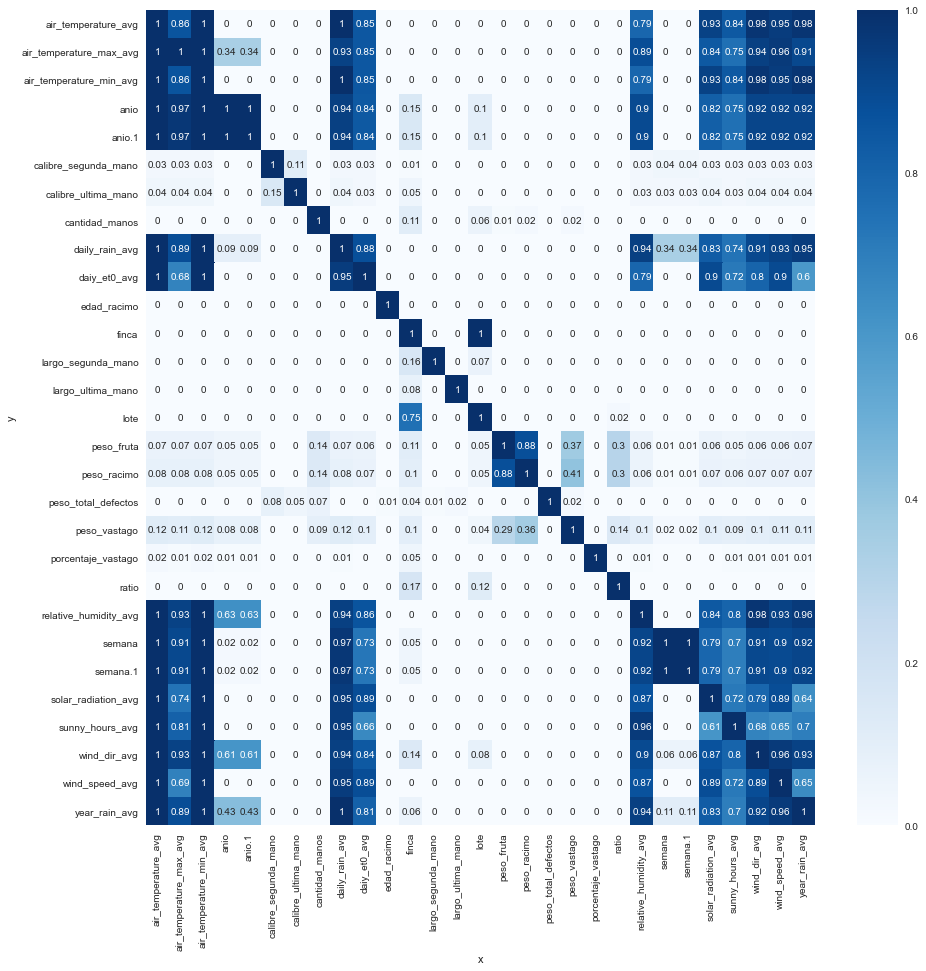

In [50]:
pps_data_clean = pps.matrix(data_clean)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
pps_data_clean = pps_data_clean.apply(lambda x: round(x, 2))

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(pps_data_clean, vmin=0, vmax=1, cmap="Blues", annot=True)

De la matriz de *predictive power score* se observa que las variables más correlacionadas con `peso_total_defectos` son `calibre_segunda_mano` y `cantidad_manos`.